In [5]:
import os
import pandas as pd

# set working directory
os.chdir('/home/gyk/project/lw_atac_nf')

boolean_file = 'results/bwa/merged_library/macs2/narrow_peak/consensus/consensus_peaks.mLb.clN.boolean.txt'
annotate_file = 'results/bwa/merged_library/macs2/narrow_peak/consensus/consensus_peaks.mLb.clN.annotatePeaks.txt'

# Read the boolean file and the annotate file
boolean_file_df = pd.read_csv(boolean_file, sep='\t', header = 0)
annotate_file_df = pd.read_csv(annotate_file, sep='\t', header = 0)

# Filter rows where all three replicates are True
replicate_columns_true = ['Ava_REP1.mLb.clN.bool', 
                    'Ava_REP2.mLb.clN.bool', 
                    'Ava_REP3.mLb.clN.bool']

replicate_columns_false = ['DZ_REP1.mLb.clN.bool', 
                    'DZ_REP2.mLb.clN.bool', 
                    'DZ_REP3.mLb.clN.bool']

# 取replicate_columns_true均为True以及replicate_columns_false均为False的行
filtered_boolean_file_df = boolean_file_df[(boolean_file_df[replicate_columns_true].all(axis=1))]
filtered_boolean_file_df = filtered_boolean_file_df[(filtered_boolean_file_df['DZ_REP1.mLb.clN.bool'] == False) & (filtered_boolean_file_df['DZ_REP2.mLb.clN.bool'] == False) & (filtered_boolean_file_df['DZ_REP3.mLb.clN.bool'] == False)]

print(len(filtered_boolean_file_df))

# filter the dataframes based on interval_id
interval_ids = filtered_boolean_file_df['interval_id']
filtered_annotate_df = annotate_file_df[annotate_file_df.iloc[:, 0].isin(interval_ids)]

filtered_annotate_df[["Chr", "Start", "End", "PeakID (cmd=annotatePeaks.pl consensus_peaks.mLb.clN.bed Bomo_genome_assembly_chr.fa -gid -gtf Bomo_gene_models_chr.gtf -cpu 6)",  "Nearest PromoterID","Strand",]].to_csv('analysis/results/DZ_Ava_diff_consensus_peaks.bed', sep='\t', index=False)

promoter_df = filtered_annotate_df[filtered_annotate_df['Annotation'].str.split('-').str[0] == 'promoter']
promoter_df[["Chr", "Start", "End", "PeakID (cmd=annotatePeaks.pl consensus_peaks.mLb.clN.bed Bomo_genome_assembly_chr.fa -gid -gtf Bomo_gene_models_chr.gtf -cpu 6)",  "Nearest PromoterID","Strand",]].to_csv('analysis/results/DZ_Ava_diff_consensus_peaks_promoter.bed', sep='\t', index=False, header=False)

446


In [7]:
# sort the dataframes based on Chr and Start
filtered_annotate_df.sort_values(by=['Chr', 'Start'], inplace=True)
filtered_annotate_df.head()

/tmp/ipykernel_3321059/876232917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_annotate_df.sort_values(by=['Chr', 'Start'], inplace=True)


,PeakID (cmd=annotatePeaks.pl consensus_peaks.mLb.clN.bed Bomo_genome_assembly_chr.fa -gid -gtf Bomo_gene_models_chr.gtf -cpu 6),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
42224,Interval_283,chr1,17520562,17520905,+,0,NaN,promoter-TSS (KWMTBOMO00588),-promoter-TSS (KWMTBOMO00588),-40,KWMTBOMO00588,KWMTBOMO00588,KWMTBOMO00588.mrna1,NaN,NaN,NaN,NaN,NaN,NaN
37885,Interval_368,chr10,380080,380965,+,0,NaN,Intergenic,Intergenic,51606,KWMTBOMO05398,KWMTBOMO05398,KWMTBOMO05398.mrna1,NaN,NaN,NaN,NaN,NaN,NaN
36195,Interval_432,chr10,1205864,1206608,+,0,NaN,"exon (KWMTBOMO05409, exon 1 of 1)","-exon (KWMTBOMO05409, exon 1 of 1)",990,KWMTBOMO05409,KWMTBOMO05409,KWMTBOMO05409.mrna1,NaN,NaN,NaN,NaN,NaN,NaN
41125,Interval_667,chr10,3659095,3659989,+,0,NaN,Intergenic,Intergenic,11825,KWMTBOMO05502,KWMTBOMO05502,KWMTBOMO05502.mrna1,NaN,NaN,NaN,NaN,NaN,NaN
28000,Interval_675,chr10,3737033,3737475,+,0,NaN,promoter-TSS (KWMTBOMO05503),-promoter-TSS (KWMTBOMO05503),-72,KWMTBOMO05503,KWMTBOMO05503,KWMTBOMO05503.mrna1,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_3321059/4100297928.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = pd.cut(df['Distance to TSS'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_3321059/4100297928.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_counts.index, y=group_counts.values, palette="muted")


42224     L 0-1 kb
37885    R 5-10 kb
36195          TSS
41125    R 5-10 kb
28000     L 0-1 kb
           ...    
20506    R 5-10 kb
2029      R 3-5 kb
33869    R 5-10 kb
38247     R 3-5 kb
2607      R 3-5 kb
Name: Group, Length: 446, dtype: category
Categories (12, object): ['L >100 kb' < 'L 10-100 kb' < 'L 5-10 kb' < 'L 3-5 kb' ... 'R 1-3 kb' < 'R 3-5 kb' < 'R 5-10 kb' < 'R 10-100 kb']


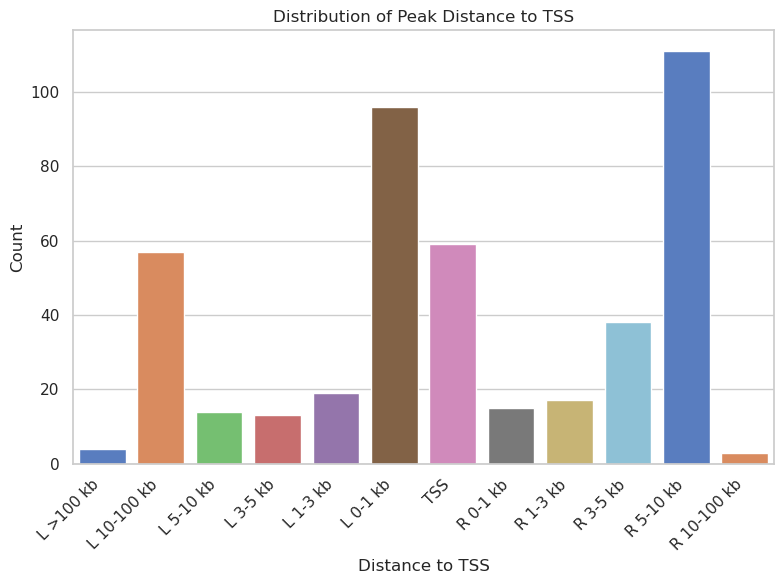

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = filtered_annotate_df

# 自定义区间
bins = [-float('inf'), -100000, -10000, -5000, -3000, -1000, 0, 1000, 3000, 5000, 10000, 100000, float('inf')]
labels = [
    "L >100 kb", "L 10-100 kb", "L 5-10 kb", "L 3-5 kb", "L 1-3 kb", "L 0-1 kb", 
    "TSS", "R 0-1 kb", "R 1-3 kb", "R 3-5 kb", "R 5-10 kb", "R 10-100 kb"
]

# 将距离划分到区间
df['Group'] = pd.cut(df['Distance to TSS'], bins=bins, labels=labels, right=False)
print(df['Group'])
# 统计每个区间的数量
group_counts = df['Group'].value_counts(sort=False)

# 设置CNS风格
sns.set_theme(style="whitegrid", palette="muted")

# 绘制频率直方图
plt.figure(figsize=(8, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, palette="muted")


plt.xlabel("Distance to TSS")
plt.ylabel('Count')
plt.title('Distribution of Peak Distance to TSS')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 在柱状图上标注数字
for i, count in enumerate(group_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# 显示图表
plt.savefig("analysis/results/promoter_distance_frequency.pdf", dpi=720, bbox_inches="tight")
plt.show()

# 显示图表
plt.show()

In [8]:
# calculate the portion of all kind of peaks on Annotation
df_annotation = filtered_annotate_df['Annotation'].str.split('(').str[0]
annotation_frequency = df_annotation.value_counts()

print(annotation_frequency)

Annotation
Intergenic       214
promoter-TSS     121
intron            73
exon              34
TTS                4
Name: count, dtype: int64


/tmp/ipykernel_3321059/1377699471.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=annotation_frequency.index, y=annotation_frequency.values, palette="muted")


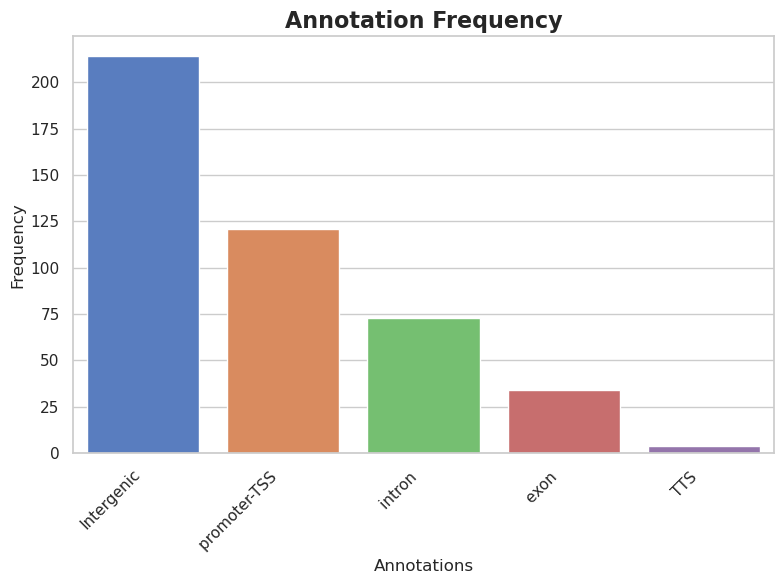

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置CNS风格
sns.set_theme(style="whitegrid", palette="muted")

# 绘制频率直方图
plt.figure(figsize=(8, 6))
sns.barplot(x=annotation_frequency.index, y=annotation_frequency.values, palette="muted")

# 设置标题和标签
plt.title("Annotation Frequency", fontsize=16, weight='bold')
plt.xlabel("Annotations", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# 显示图形
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
# 保存图片到本地
plt.savefig("analysis/results/annotation_frequency.pdf", dpi=720, bbox_inches="tight")
plt.show()


Distance to TSS
-162800    1
-131504    1
-123241    1
-100366    1
-85918     1
          ..
 88344     1
 97249     1
 115402    1
 116135    1
 122616    1
Name: count, Length: 437, dtype: int64


<Figure size 800x600 with 0 Axes>

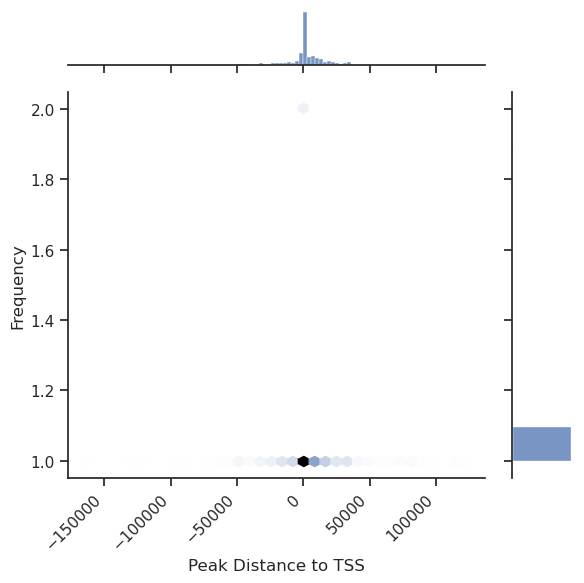

In [10]:
peak_distance_to_tss_frequency = filtered_annotate_df['Distance to TSS'].value_counts().sort_index()
print(peak_distance_to_tss_frequency)
# 绘制频率直方图
# 设置CNS风格
sns.set_theme(style="ticks")

# 绘制频率直方图
plt.figure(figsize=(8, 6))
sns.jointplot(x=peak_distance_to_tss_frequency.index, y=peak_distance_to_tss_frequency.values, kind = "hex")

# 设置标题和标签
# plt.title("Promoter Distance Frequency", fontsize=16, weight='bold')
plt.xlabel("Peak Distance to TSS", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# 显示图形
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("analysis/results/promoter_distance_frequency.pdf", dpi=720, bbox_inches="tight")
plt.show()

In [11]:
nearest_geneID = df_promoter["Nearest PromoterID"]
nearest_geneID.head()
nearest_geneID.to_csv("analysis/results/nearest_TSS_promoterID.csv", index=False, header=False)

NameError: name 'df_promoter' is not defined